In [1]:
import cv2,os
import numpy as np
from tqdm import tqdm 
from matplotlib import pyplot as plt

# Read Path 

In [2]:
root = "../../Datasets/211202NDAcquisition/CellSplit/"
classes = ["NDAcquisition-01","NDAcquisition-01x40","NDAcquisition-02Nami_x20","NDAcquisition-02Nami_x40"]
path01x20 = root+classes[0]
path02Namix20 = root+classes[2]
path01x40 = root+classes[1]
path02Namix40 = root+classes[3]

In [3]:
DataPath_01x20=[]

for root,dirs,files in os.walk(path01x20):
    for file_name in files:
        path = os.path.join(root,file_name)
        label = os.path.join(file_name)
        DataPath_01x20.append(path)
        
print("len(DataPath_01x20):",len(DataPath_01x20))

############################################################

DataPath_02Namix20=[]

for root,dirs,files in os.walk(path02Namix20):
    for file_name in files:
        path = os.path.join(root,file_name)
        label = os.path.join(file_name)
        DataPath_02Namix20.append(path)
        
print("len(DataPath_02Namix20):",len(DataPath_02Namix20))

len(DataPath_01x20): 0
len(DataPath_02Namix20): 0


In [4]:
DataPath_01x40=[]

for root,dirs,files in os.walk(path01x40):
    for file_name in files:
        path = os.path.join(root,file_name)
        label = os.path.join(file_name)
        DataPath_01x40.append(path)
        
print("len(DataPath_01x40):",len(DataPath_01x40))

############################################################
DataPath_02Namix40=[]

for root,dirs,files in os.walk(path02Namix40):
    for file_name in files:
        path = os.path.join(root,file_name)
        label = os.path.join(file_name)
        DataPath_02Namix40.append(path)
        
print("len(DataPath_02Namix40):",len(DataPath_02Namix40))

len(DataPath_01x40): 12149
len(DataPath_02Namix40): 1741


*********

# Read Image

In [9]:
imread_01x20=[]
for i in tqdm(range(len(DataPath_01x20))):
    img = cv2.imread(DataPath_01x20[i])
    imread_01x20.append(img)
    
imread_01x20=np.array(imread_01x20)
np.save("imread_01x20.npy",imread_01x20,'dtype=object')

0it [00:00, ?it/s]


In [10]:
imread_02Namix20=[]
for i in tqdm(range(len(DataPath_02Namix20))):
    img = cv2.imread(DataPath_02Namix20[i])
    
    imread_02Namix20.append(img)
    
imread_02Namix20=np.array(imread_02Namix20)
np.save("imread_02Namix20.npy",imread_02Namix20,'dtype=object')

0it [00:00, ?it/s]


In [29]:
imread_01x40=[]
for i in tqdm(range(len(DataPath_01x40))):
    img = cv2.imread(DataPath_01x40[i])
    if img.shape[0]<=100 and img.shape[1]<=100:
        imread_01x40.append(img)
    
imread_01x40=np.array(imread_01x40)
np.save("imread_01x40.npy",imread_01x40,'dtype=object')

100%|██████████████████████████████████████████████████████| 12149/12149 [00:08<00:00, 1410.36it/s]
/tmp/9883330.1.gpu/ipykernel_43855/1899761046.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  imread_01x40=np.array(imread_01x40)


In [30]:
imread_02Namix40=[]
for i in tqdm(range(len(DataPath_02Namix40))):
    img = cv2.imread(DataPath_02Namix40[i])
    if img.shape[0]<=100 and img.shape[1]<=100:
        imread_02Namix40.append(img)
    
imread_02Namix40=np.array(imread_02Namix40)
np.save("imread_02Namix40.npy",imread_02Namix40)

100%|████████████████████████████████████████████████████████| 1741/1741 [00:01<00:00, 1437.09it/s]
/tmp/9883330.1.gpu/ipykernel_43855/871532552.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  imread_02Namix40=np.array(imread_02Namix40)


*********

# Max_shape_0 , Max_shape_1


### >> Cells 

    * 01x20
        * Max_shape_0:  234
        * Max_shape_1:  214

    * 02Namix20
        * Max_shape_0:  254
        * Max_shape_1:  234

    * 01x40
        * Max_shape_0:  464
        * Max_shape_1:  499

    * 02Namix40
        * Max_shape_0:  354
        * Max_shape_1:  274

In [31]:
Data_02Nami=np.load("data/imread_02Namix40.npy",allow_pickle=True)
Data_01=np.load("data/imread_01x40.npy",allow_pickle=True)
print("Data_01.shape:", Data_01.shape)
print("Data_02Nami.shape:", Data_02Nami.shape)

Data_01.shape: (11990,)
Data_02Nami.shape: (1738,)


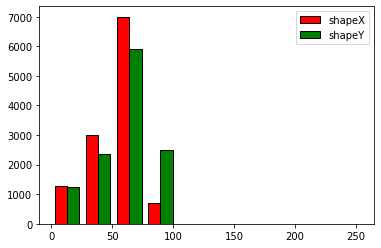

In [32]:
shapeX=[]
shapeY=[]
for i in range(len(Data_01)):
    shapeX.append(Data_01[i].shape[0])
    shapeY.append(Data_01[i].shape[1])    
fig, ax = plt.subplots()
ax.hist([shapeX,shapeY], label=["shapeX", "shapeY"], color=["r", "g"], ec="k",range=[0,255])
ax.legend()

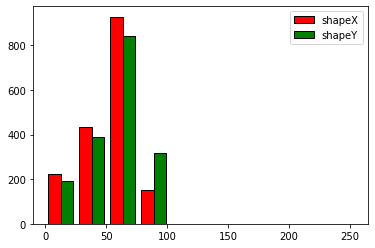

In [33]:
shapeX=[]
shapeY=[]
for i in range(len(Data_02Nami)):
    shapeX.append(Data_02Nami[i].shape[0])
    shapeY.append(Data_02Nami[i].shape[1])    
fig, ax = plt.subplots()
ax.hist([shapeX,shapeY], label=["shapeX", "shapeY"], color=["r", "g"], ec="k",range=[0,255])
ax.legend()

In [34]:
num=0
for n in range(len(Data_01)):
    img = Data_01[n]
    if img.shape[0]<=100 and img.shape[1]<=100:
        num+=1
print(num)


num=0
for n in range(len(Data_02Nami)):
    img = Data_01[n]
    if img.shape[0]<=100 and img.shape[1]<=100:
        num+=1
print(num)

11990
1738
